In [ ]:
from google.colab import files

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Re_list = [2400, 3000, 10000]


In [ ]:
rho = 1.0
nu_list = [1.0 / Re for Re in Re_list]
u_bulk = 0.5
R = 1.0

In [ ]:
file_paths = [f'./drive/MyDrive/DNS_pipe/Re{Re}/vel_profile.dat' for Re in Re_list]
data_dict = {}

for Re, file_path in zip(Re_list, file_paths):
    data = pd.read_csv(file_path, delim_whitespace=True, skiprows=2,
                       names=['r', 'uz(r)'], dtype={'r': str, 'uz(r)': str})
    data['r'] = data['r'].astype(float)
    data['uz(r)'] = data['uz(r)'].astype(float)
    #Can be removed
    data['dr']=data['r'].diff()
    data['du_dr'] = np.abs(np.gradient(data['uz(r)']) / data['r'].diff())
    data['du_dr'].fillna(0, inplace=True)
    data['u_tau']=np.sqrt((1/Re)*data['du_dr'])
    data_dict[f'data_{Re}'] = data
data_2400 = data_dict['data_2400']
data_3000 = data_dict['data_3000']
data_10000 = data_dict['data_10000']

In [ ]:
data_list = [data_2400, data_3000, data_10000]

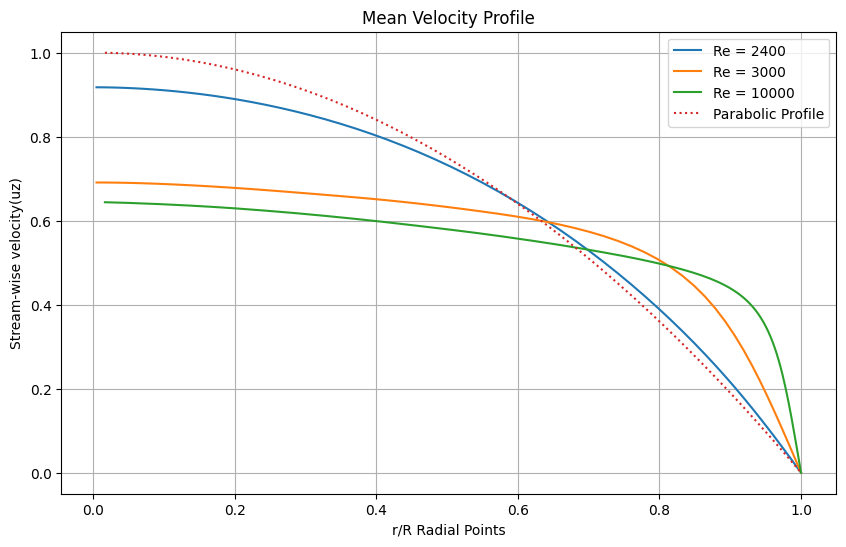

In [ ]:
plt.figure(figsize=(10, 6))
para=[1-x*x for x in data['r']]
for Re, data in zip(Re_list, data_list):
    plt.plot(data['r'], data['uz(r)'], label=f'Re = {Re}', linestyle='-')

plt.plot(data['r'],para,linestyle='dotted',label='Parabolic Profile')
plt.xlabel('r/R Radial Points')
plt.ylabel('Stream-wise velocity(uz)')
plt.title('Mean Velocity Profile')
plt.grid(True)
plt.legend()
plt.savefig("a.png", bbox_inches="tight")
plt.show()


In [ ]:
def compute_du_dr(data):
    dr = data['r'][1] - data['r'][0]
    du_dr = np.gradient(data['uz(r)'], dr)
    return du_dr

In [ ]:
def compute_Re_tau(data, Re):
    nu = 1.0 / Re
    # u_tau = np.abs(data['uz(r)'][1])
    u_tau = np.sqrt((1/Re)*np.abs(data['du_dr'].iloc[-1]))
    Re_tau = u_tau / nu
    return Re_tau

In [ ]:
u_tau_list = []
Re_tau_list = []

for Re in Re_list:
    data = data_dict[f'data_{Re}']
    dudr = compute_du_dr(data)

    # u_tau = np.abs(data['uz(r)'][1])
    u_tau = np.sqrt((1/Re)*np.abs(data['du_dr'].iloc[-1]))
    Re_tau = compute_Re_tau(data, Re)

    u_tau_list.append(u_tau)
    Re_tau_list.append(Re_tau)

    print(f"For Re = {Re}:")
    print("Friction velocity (u_tau) =", u_tau)
    print("Friction Reynolds number (Re_tau) =", Re_tau)



For Re = 2400:
Friction velocity (u_tau) = 0.031130303108046
Friction Reynolds number (Re_tau) = 74.7127274593104
For Re = 3000:
Friction velocity (u_tau) = 0.03638960107907004
Friction Reynolds number (Re_tau) = 109.16880323721013
For Re = 10000:
Friction velocity (u_tau) = 0.03149857215226502
Friction Reynolds number (Re_tau) = 314.98572152265024


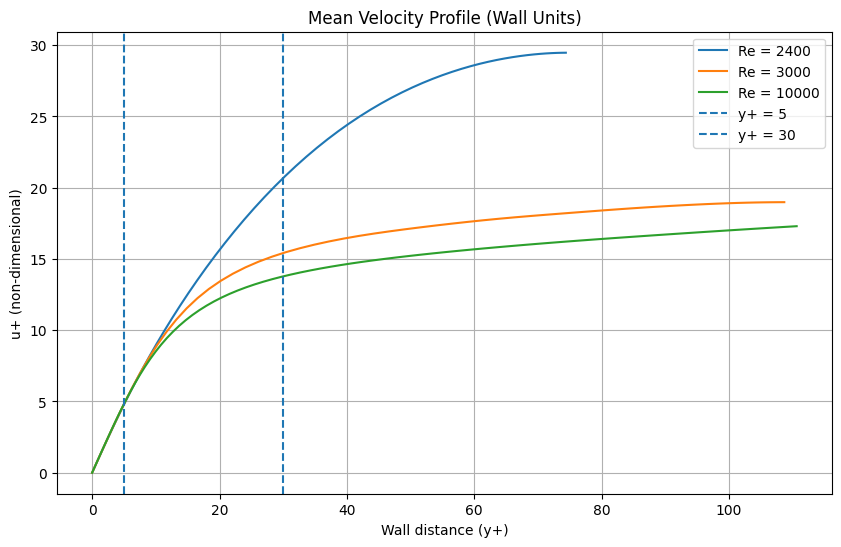

In [ ]:
u_plus_list = []
y_plus_list = []

for Re, nu, u_tau in zip(Re_list, nu_list, u_tau_list):

    data = data_dict[f'data_{Re}']
    dudr = np.gradient(data['uz(r)'], data['r'])
    # u_plus = np.sqrt(nu * np.abs(dudr))
    u_plus=data['uz(r)']/u_tau
    data['u_plus']=data['uz(r)']/u_tau
    u_plus_list.append(u_plus)

    y_plus = (1-data['r']) * u_tau / nu
    data['y_plus']=(1-data['r']) * u_tau / nu
    y_plus_list.append(y_plus)

# Plot mean velocity profiles in wall units
plt.figure(figsize=(10, 6))
for i, Re in enumerate(Re_list):
    plt.plot(y_plus_list[i][-80:], u_plus_list[i][-80:], label=f'Re = {Re}', linestyle='-')



plt.xlabel('Wall distance (y+)')
plt.ylabel('u+ (non-dimensional)')
# y+ = 5
plt.axvline(5,linestyle='--',label='y+ = 5')
# y+ = 30
plt.axvline(30,linestyle='--',label='y+ = 30')
plt.title('Mean Velocity Profile (Wall Units)')
plt.grid(True)
plt.savefig("c.png", bbox_inches="tight")
plt.legend()
plt.show()

Viscous Sublayer:
Grid points for flow Re:2400 = 12
Grid points for flow Re:3000 = 10
Grid points for flow Re:10000 = 17
Buffer layer:
Grid points for flow Re:2400 = 19
Grid points for flow Re:3000 = 15
Grid points for flow Re:10000 = 24
[0.0004166666666666667, 0.0003333333333333333, 0.0001]
[0.031130303108046, 0.03638960107907004, 0.03149857215226502]


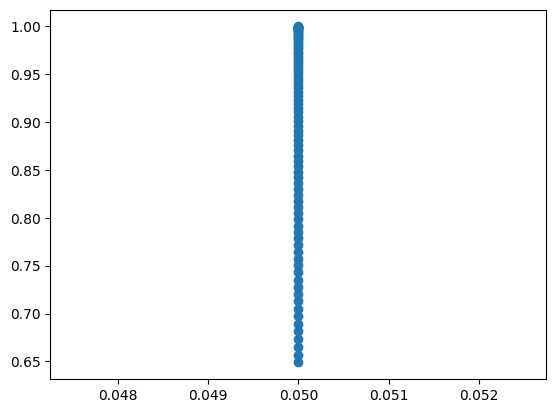

In [ ]:
grid_points_v={}
grid_points_b={}
for i, Re in enumerate(Re_list):
    for y_plus in y_plus_list[i]:
        if(y_plus <=5):
            grid_points_v[Re]=grid_points_v.get(Re,0)+1
        elif(y_plus > 5 and y_plus <=30):
            grid_points_b[Re]=grid_points_b.get(Re,0)+1
print("Viscous Sublayer:")
for Re,Value in grid_points_v.items():
    print(f'Grid points for flow Re:{Re} = {Value}')
print("Buffer layer:")
for Re,Value in grid_points_b.items():
    print(f'Grid points for flow Re:{Re} = {Value}')

print(nu_list)
print(u_tau_list)
data_dict['data_10000']
# data_dict['data_2400'][data_dict['data_2400']['y_plus']<=5]
# data_dict['data_3000'][data_dict['data_3000']['y_plus']<=5]
# data_dict['data_10000'][data_dict['data_10000']['y_plus']<=5]
# plt.scatter([0.01 for i in range(32)],data_dict['data_2400']['r'][-32:])
# plt.scatter([0.03 for i in range(32)],data_dict['data_3000']['r'][-32:])
plt.scatter([0.05 for i in range(80)],data_dict['data_10000']['r'][-80:])

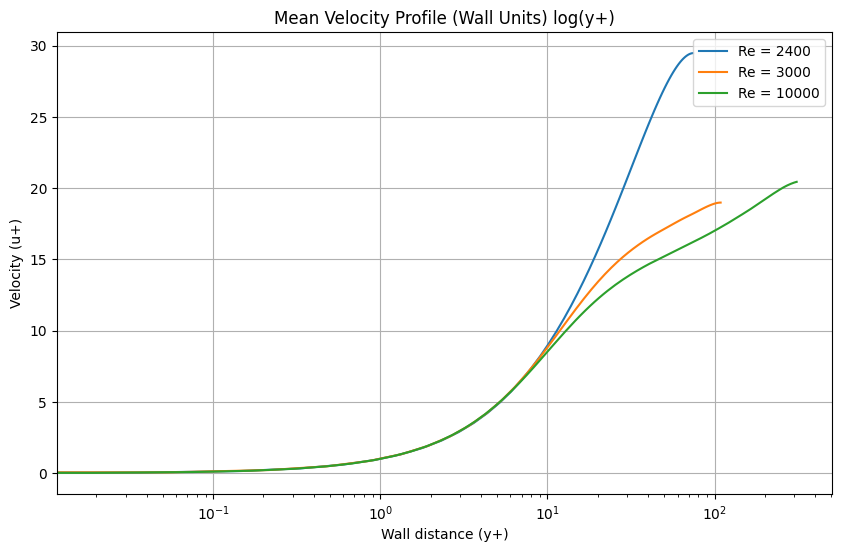

In [ ]:
# Plot mean velocity profiles in wall units in log scale
plt.figure(figsize=(10, 6))
for i, Re in enumerate(Re_list):
    plt.semilogx(y_plus_list[i], u_plus_list[i], label=f'Re = {Re}', linestyle='-')

plt.xlabel('Wall distance (y+)')
plt.ylabel('Velocity (u+)')
plt.title('Mean Velocity Profile (Wall Units) log(y+)')
plt.grid(True)
plt.savefig("e.png", bbox_inches="tight")
plt.legend()
plt.show()

In [ ]:
Cf_list=[]
Cfb_list=[]
for Re, Re_tau in zip(Re_list,Re_tau_list):
    Cf=8*(Re_tau/Re)**2
    Cfb=0.0791*np.power(Re,-0.25)
    print(f"For Re = {Re}:")
    print(f"Cf = {Cf: .6f}")
    print(f"Cf ( Blasius Empirical) = {Cfb: .6f}\n")
    Cf_list.append(Cf)
    Cfb_list.append(Cfb)


For Re = 2400:
Cf =  0.007753
Cf ( Blasius Empirical) =  0.011301

For Re = 3000:
Cf =  0.010594
Cf ( Blasius Empirical) =  0.010688

For Re = 10000:
Cf =  0.007937
Cf ( Blasius Empirical) =  0.007910

